# Exploratory Data Analysis On Merged Dataset

In this notebook, we are going to perform EDA on Merged Dataset to get deep insights into our plant image data which would further help us in the next step of our project i.e. Preprocessing.

## Identifying Class Imbalance
Our very first step is Identifying Class Imbalance. We are going to find the number of images assigned to each class and plot them in a bar chart to easily identify any imbalances.

In [26]:
# Importing dependencies
# !pip install dask
import os
import pathlib
import pandas as pd
import matplotlib.pyplot as plt
import PIL
import PIL.Image
import numpy as np
import dask.bag
from dask.diagnostics import ProgressBar
import pandas as pd
import random
import cv2

In [27]:
# Setting up dataset path
data_dir = pathlib.Path(r"C:\Users\Vishal Sahni\Desktop\TUTORIALS\Omdena\Algeria_Chapter_Green_part-2\task-2-eda-for-diseases-and-pests-detection\Merging_the_dataset\Datasets")
class_name = os.listdir(data_dir)
print(f"Total number of classes: {len(class_name)}")
class_name

Total number of classes: 49


['Apple Apple scab',
 'Apple Black rot',
 'Apple Cedar apple rust',
 'Apple healthy',
 'Blueberry healthy',
 'Cherry healthy',
 'Cherry Powdery mildew',
 'Corn Gray Leaf Spot',
 'Corn healthy',
 'Corn Leaf Blight',
 'Corn Leaf Common Rust',
 'Corn Northern Leaf Blight',
 'Grape Black rot',
 'Grape Esca (Black Measles)',
 'Grape healthy',
 'Grape Leaf blight (Isariopsis Leaf Spot)',
 'Orange Haunglongbing (Citrus greening)',
 'Peach Bacterial spot',
 'Peach healthy',
 'Pepper bell Bacterial spot',
 'Pepper bell healthy',
 'Potato Early blight',
 'Potato healthy',
 'potato hollow heart',
 'Potato Late blight',
 'Raspberry healthy',
 'Rice Bacterial leaf blight',
 'Rice Leaf smut',
 'Rice Sogatella',
 'Soybean healthy',
 'Squash___Powdery_mildew',
 'Strawberry healthy',
 'Strawberry Leaf_scorch',
 'Tea algal leaf',
 'Tea anthracnose',
 'Tea bird eye spot',
 'Tea brown blight',
 'Tea healthy',
 'Tea red leaf spot',
 'Tomato Bacterial spot',
 'Tomato Early blight',
 'Tomato healthy',
 'Toma

From above code we found that there are 49 classes which consists of healthy and diseased images.

In [28]:
number_classes = {}
for name in class_name:
  number_classes[name] = len(os.listdir(f"{data_dir}/{name}"))

number_classes

{'Apple Apple scab': 2016,
 'Apple Black rot': 1988,
 'Apple Cedar apple rust': 880,
 'Apple healthy': 1645,
 'Blueberry healthy': 1502,
 'Cherry healthy': 853,
 'Cherry Powdery mildew': 1052,
 'Corn Gray Leaf Spot': 574,
 'Corn healthy': 1162,
 'Corn Leaf Blight': 1146,
 'Corn Leaf Common Rust': 1306,
 'Corn Northern Leaf Blight': 985,
 'Grape Black rot': 1180,
 'Grape Esca (Black Measles)': 1383,
 'Grape healthy': 423,
 'Grape Leaf blight (Isariopsis Leaf Spot)': 1076,
 'Orange Haunglongbing (Citrus greening)': 5507,
 'Peach Bacterial spot': 2297,
 'Peach healthy': 360,
 'Pepper bell Bacterial spot': 997,
 'Pepper bell healthy': 1477,
 'Potato Early blight': 1000,
 'Potato healthy': 152,
 'potato hollow heart': 60,
 'Potato Late blight': 1000,
 'Raspberry healthy': 371,
 'Rice Bacterial leaf blight': 40,
 'Rice Leaf smut': 80,
 'Rice Sogatella': 26,
 'Soybean healthy': 4072,
 'Squash___Powdery_mildew': 1835,
 'Strawberry healthy': 456,
 'Strawberry Leaf_scorch': 1109,
 'Tea algal lea

Above code snippt represents the classes and their respective image count

In [29]:
total_img = sum(list(number_classes.values()))
print(f"Total number of images in our dataset is: {total_img}")

Total number of images in our dataset is: 58812


Now, plotting the bar chart to identify imbalance in our dataset

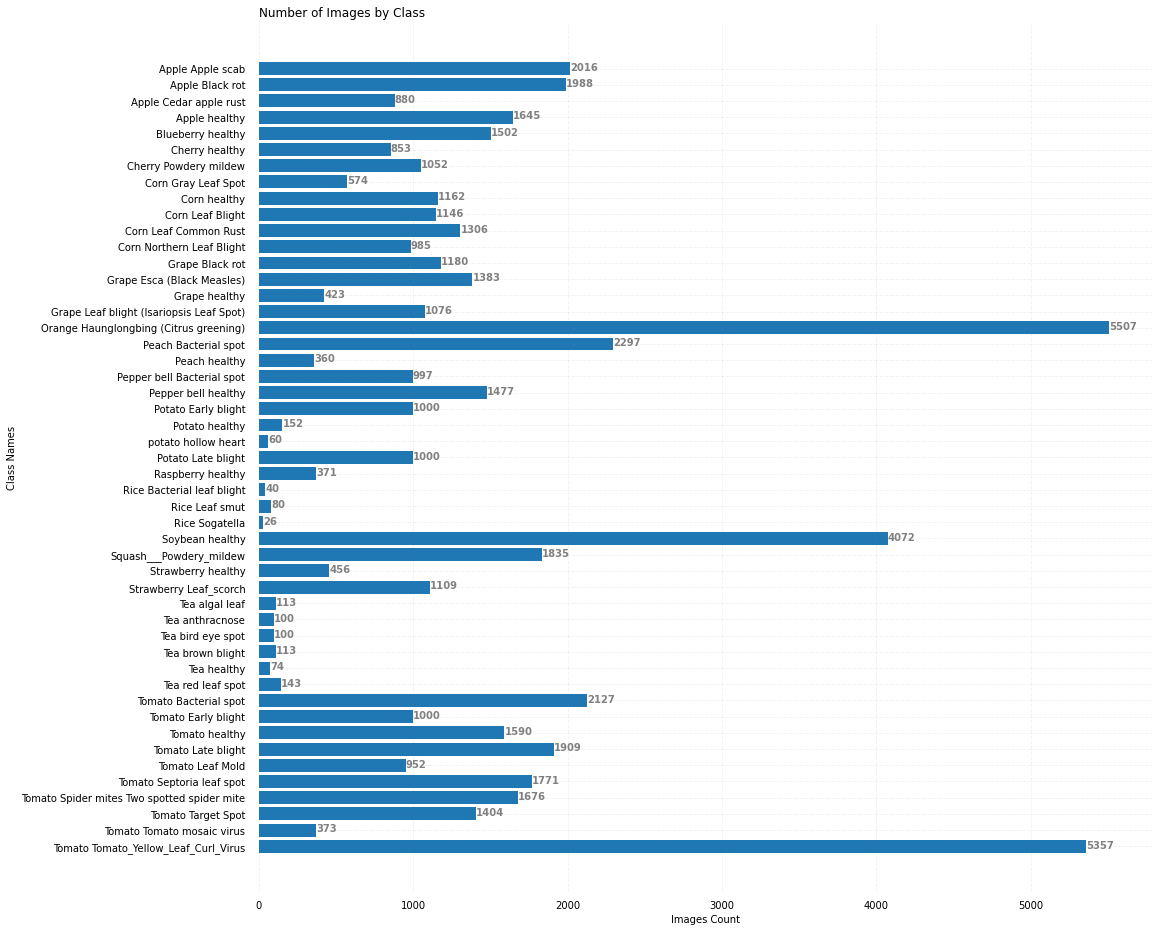

In [30]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 16))

# Horizontal Bar Plot
ax.barh(list(number_classes.keys()), list(number_classes.values()))

# Remove axis splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

# Show top values
ax.invert_yaxis()


# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
            str(round((i.get_width()), 2)),
            fontsize = 10, fontweight ='bold',
            color ='grey')

# Add Plot Title
ax.set_title('Number of Images by Class',
            loc ='left', )

plt.xlabel('Images Count')
plt.ylabel('Class Names')

# Show Plot
plt.show()

## Plotting Image Size
Consistent image size is crucial for our deep learning task, mismatched matrices will bring our project to a quick stop. So, visualizing raw image size can also help us to understand our dataset better.

In [31]:
directories = {}
for name in class_name:
  directories[name] = f"{data_dir}/{name}/"
directories

{'Apple Apple scab': 'C:\\Users\\Vishal Sahni\\Desktop\\TUTORIALS\\Omdena\\Algeria_Chapter_Green_part-2\\task-2-eda-for-diseases-and-pests-detection\\Merging_the_dataset\\Datasets/Apple Apple scab/',
 'Apple Black rot': 'C:\\Users\\Vishal Sahni\\Desktop\\TUTORIALS\\Omdena\\Algeria_Chapter_Green_part-2\\task-2-eda-for-diseases-and-pests-detection\\Merging_the_dataset\\Datasets/Apple Black rot/',
 'Apple Cedar apple rust': 'C:\\Users\\Vishal Sahni\\Desktop\\TUTORIALS\\Omdena\\Algeria_Chapter_Green_part-2\\task-2-eda-for-diseases-and-pests-detection\\Merging_the_dataset\\Datasets/Apple Cedar apple rust/',
 'Apple healthy': 'C:\\Users\\Vishal Sahni\\Desktop\\TUTORIALS\\Omdena\\Algeria_Chapter_Green_part-2\\task-2-eda-for-diseases-and-pests-detection\\Merging_the_dataset\\Datasets/Apple healthy/',
 'Blueberry healthy': 'C:\\Users\\Vishal Sahni\\Desktop\\TUTORIALS\\Omdena\\Algeria_Chapter_Green_part-2\\task-2-eda-for-diseases-and-pests-detection\\Merging_the_dataset\\Datasets/Blueberry healt

In [32]:
def get_dims(file):
    """Returns dimensions for an RGB image"""
    im = PIL.Image.open(file)
    arr = np.array(im)
    h,w,d = arr.shape
    return h,w

[########################################] | 100% Completed | 4.78 ss
[########################################] | 100% Completed | 2.79 ss
[########################################] | 100% Completed | 2.08 ss
[########################################] | 100% Completed | 2.46 ss
[########################################] | 100% Completed | 2.45 ss
[########################################] | 100% Completed | 1.99 ss
[########################################] | 100% Completed | 2.23 ss
[########################################] | 100% Completed | 2.64 ss
[########################################] | 100% Completed | 2.09 ss
[########################################] | 100% Completed | 3.98 ss
[########################################] | 100% Completed | 4.06 ss
[########################################] | 100% Completed | 2.10 ss
[########################################] | 100% Completed | 2.23 ss
[########################################] | 100% Completed | 2.23 ss
[###################

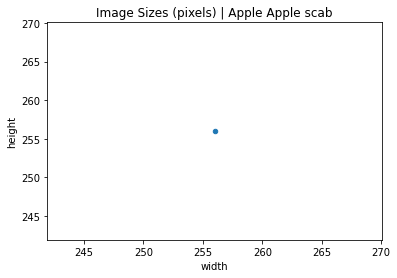

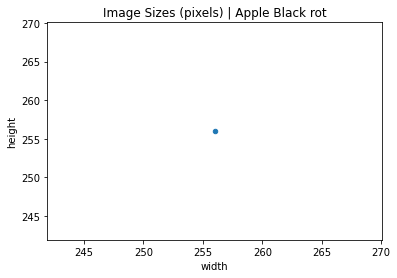

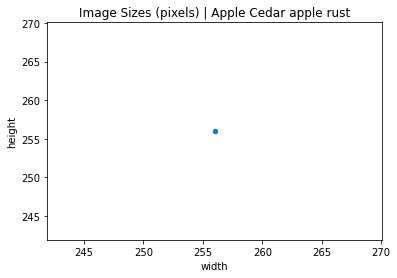

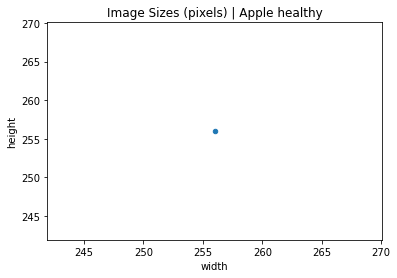

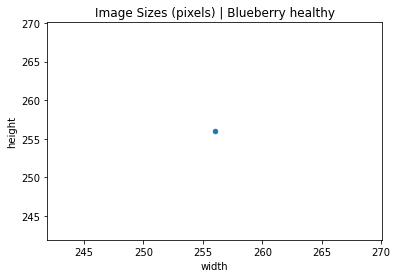

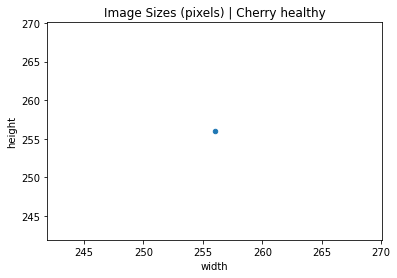

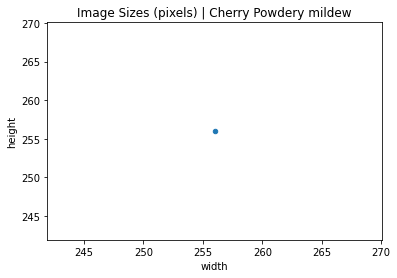

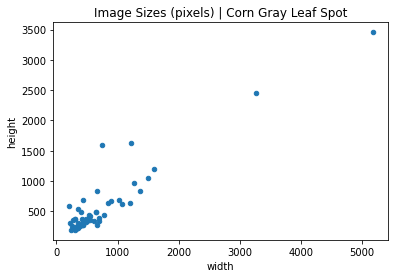

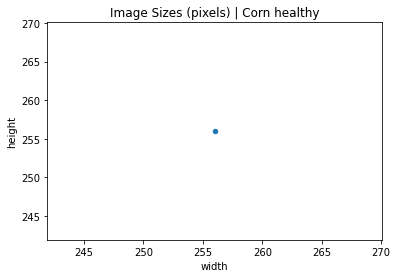

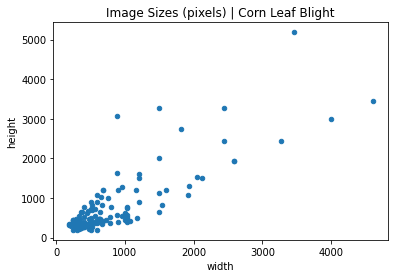

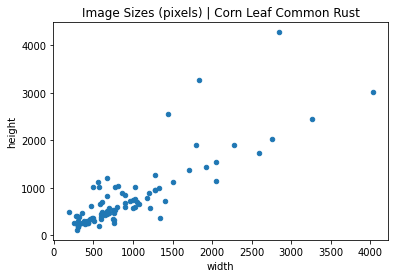

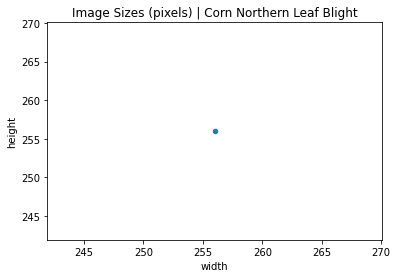

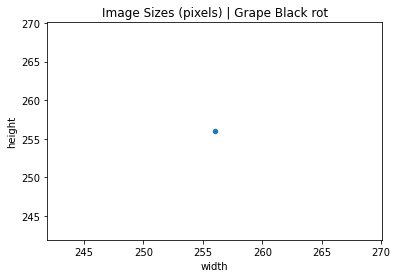

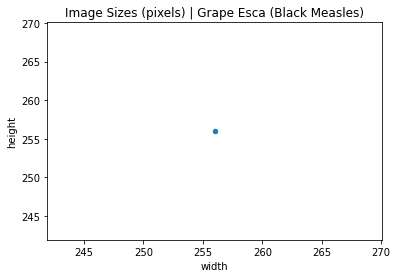

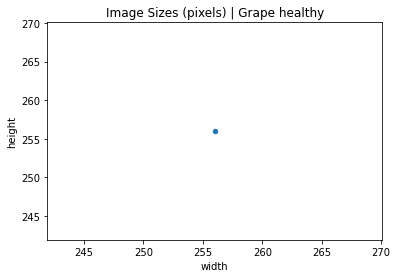

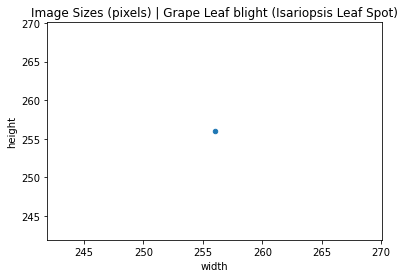

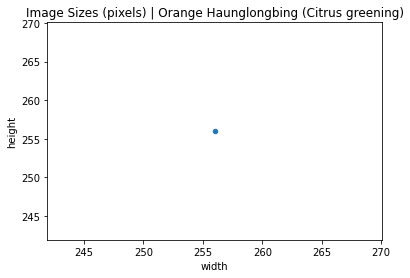

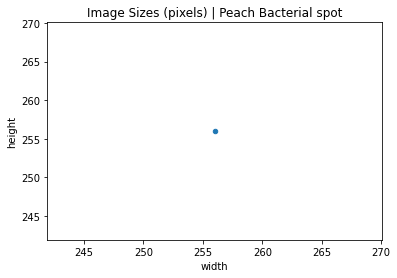

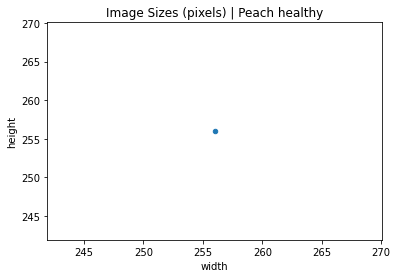

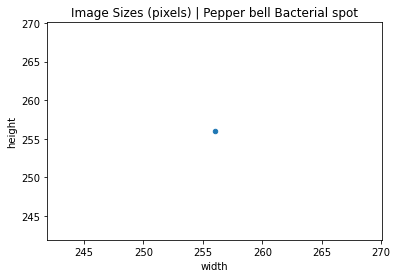

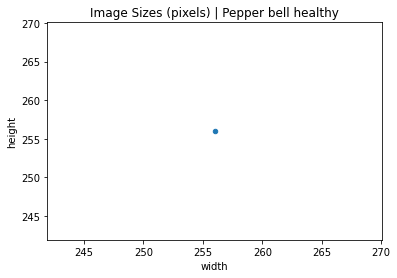

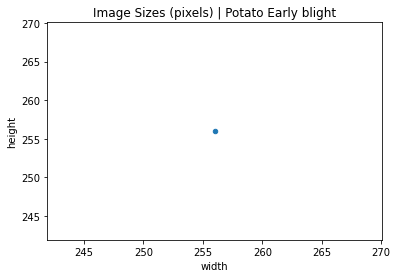

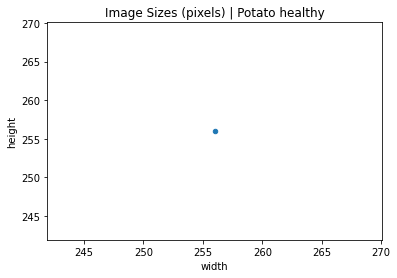

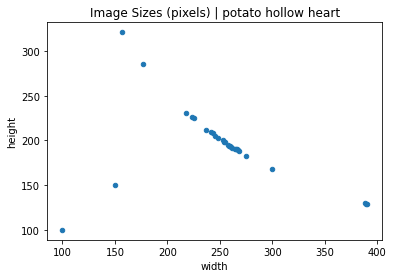

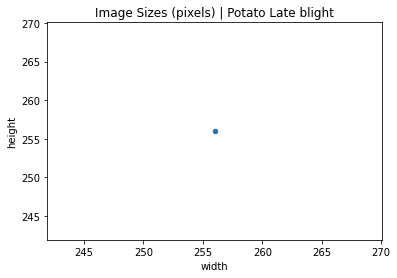

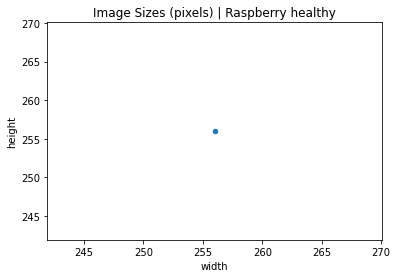

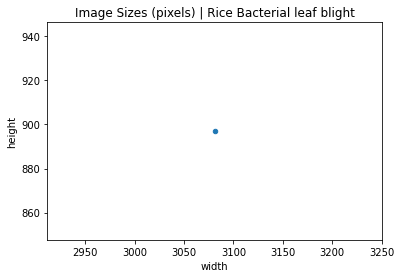

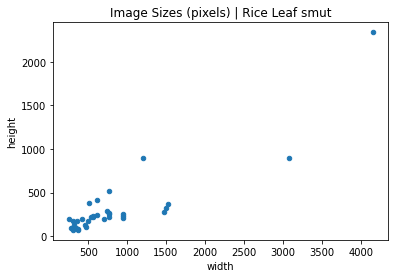

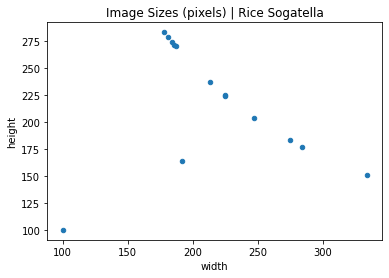

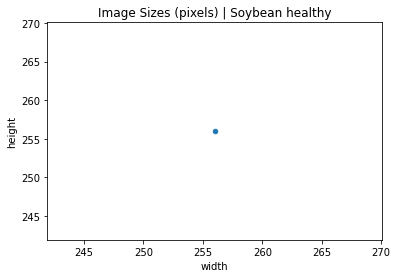

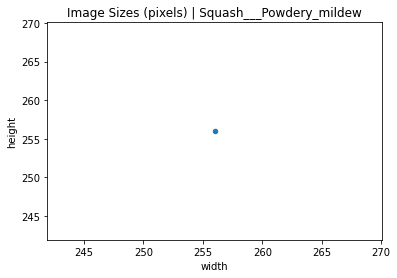

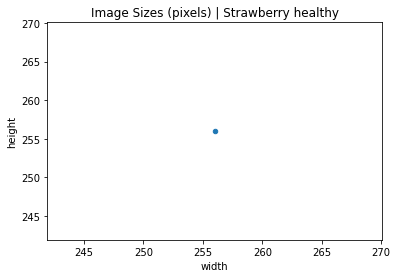

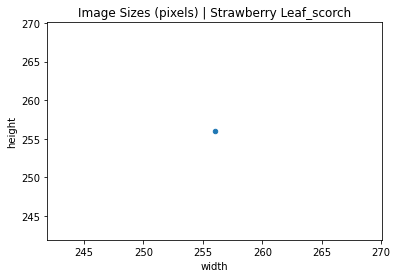

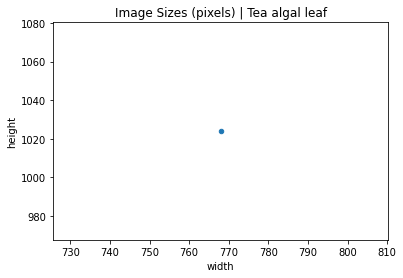

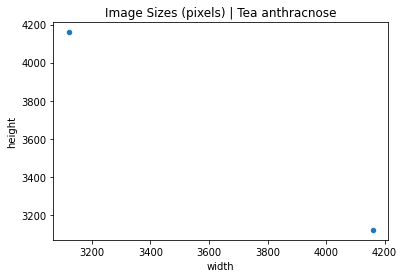

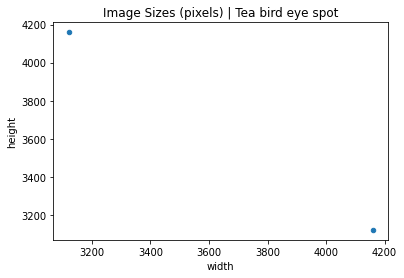

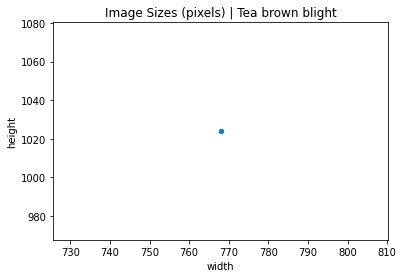

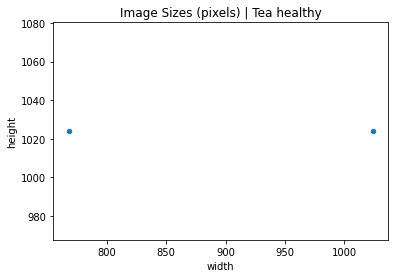

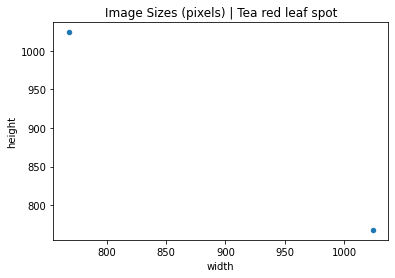

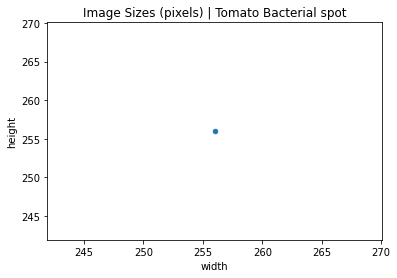

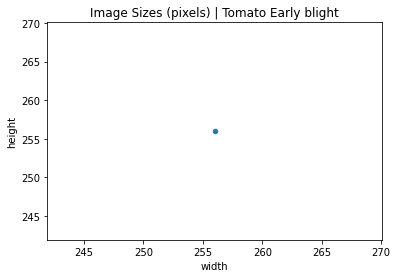

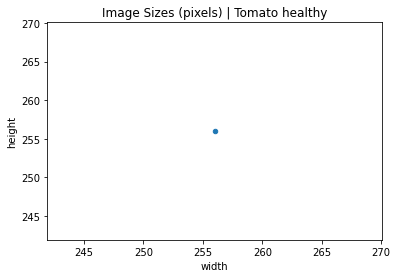

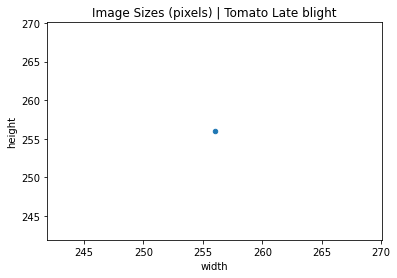

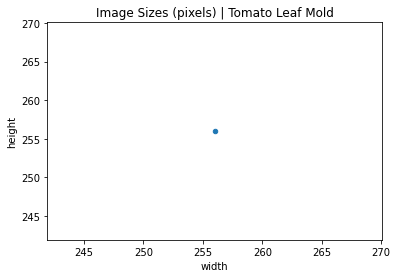

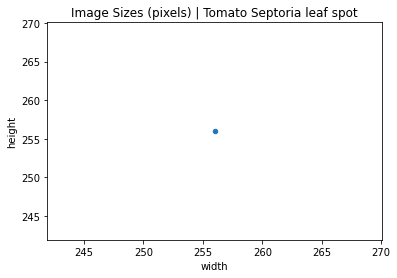

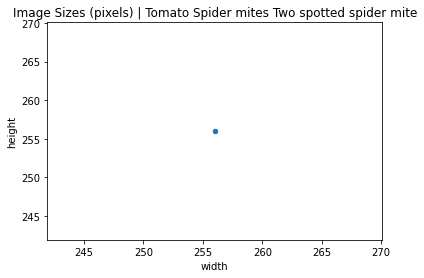

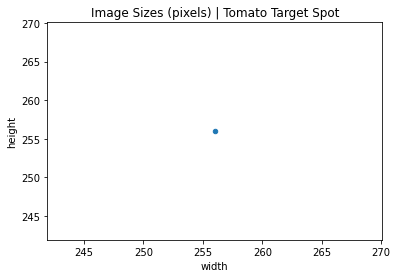

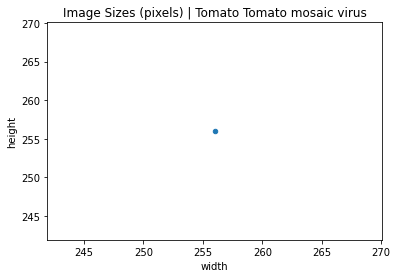

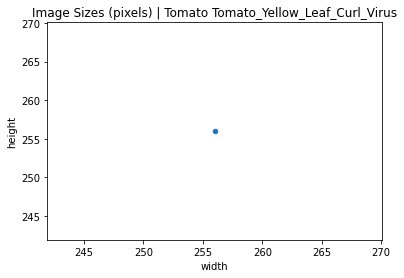

In [33]:
for n,d in directories.items():
    filepath = d
    filelist = [filepath + f for f in os.listdir(filepath)]
    dims = dask.bag.from_sequence(filelist).map(get_dims)
    with dask.diagnostics.ProgressBar():
        dims = dims.compute()
        dim_df = pd.DataFrame(dims, columns=['height', 'width'])
        sizes = dim_df.groupby(['height', 'width']).size().reset_index().rename(columns={0:'count'})
        sizes.plot.scatter(x='width', y='height');
        plt.title('Image Sizes (pixels) | {}'.format(n))

From the above plot, we can see that our dataset contains consistent image size.

## Viewing a Sampling of Images
Finally, let’s take a look at a handful of images from each class.

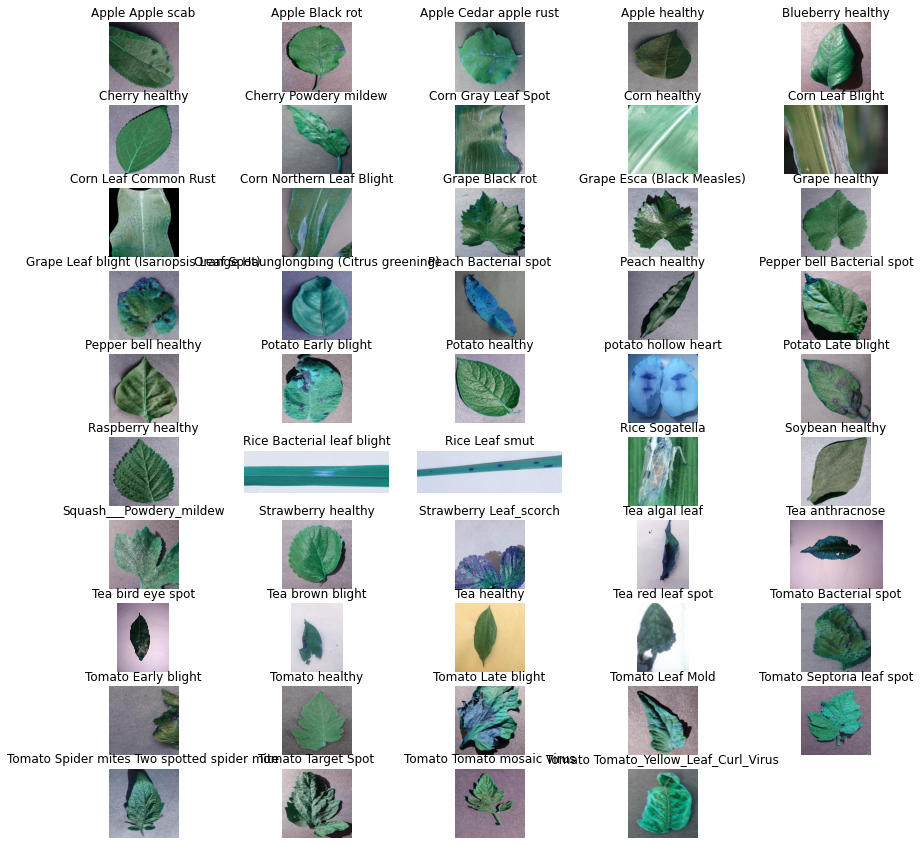

In [35]:
plt.figure(figsize=(15,15))
index = 1
for key, value in directories.items():
    img_path = value + f"{random.choice(os.listdir(value))}"
    image = cv2.imread(img_path)
    ax = plt.subplot(10,5,index)
    index += 1
    plt.imshow(image.astype("int"))
    plt.title(key)
    plt.axis('off')
  